**Load test data from excel into dataframe**

In [7]:
import pandas as pd
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Use tkinter to select the Excel file
def select_file():
    Tk().withdraw()
    file_path = askopenfilename(
        title="Select Training Excel File",
        filetypes=[("Excel files", "*.xlsx *.xls"), ("All files", "*.*")]
    )
    return file_path

# Prompt the user
print("Please select the training data file:")
training_excel_file = select_file()

if training_excel_file:
    # Read Excel file
    df_training = pd.read_excel(training_excel_file, sheet_name='Sheet1')
    
    print("Top 5 rows in the training DataFrame:")
    print(df_training.head())
else:
    print("No file selected. Please try again.")

Please select the training data file:
Top 5 rows in the training DataFrame:
   Unnamed: 0                               Combined Description  \
0       93203      PROVISION OF CATERING SERVICES    [Caterin...   
1       41610    PROVISION OF LOGISTICS SERVICES FOR HOME TEA...   
2       95154     WOG Video and Animation Period Contract and...   
3       58051    PROVISION OF LOGISTICS SERVICES FOR HOME TEA...   
4        4906    SUPPLY OF CALL CENTRE SYSTEM WITH MAINTENANC...   

                                     Commitment item  \
0  212901 - Other Assets511999 - Direct Project: ...   
1  212401 - Other Equipment511999 - Direct Projec...   
2     218999 - Other Services511699 - Other Services   
3     218999 - Other Services511199 - Other Manpower   
4  226301 - Maintenance: ICT Hardware Integrated ...   

                                         predictions  confidence  \
0  212901 - Other Assets511999 - Direct Project: ...    0.969243   
1  212401 - Other Equipment511999 - Direct

**Data cleansing**

In [9]:
# Ensure the necessary columns exist 
if 'Combined Description' not in df_training.columns or 'Commitment item' not in df_training.columns:
    raise ValueError("The training Excel file must contain 'Combined Description' and 'Commitment item' columns.")

# Data cleansing: Remove null values and strip whitespace 
df_training = df_training.dropna(subset=['Combined Description', 'Commitment item'])  
df_training['Combined Description'] = df_training['Combined Description'].str.strip()  

# Split 'Commitment item' 
df_training[['material_number', 'description']] = df_training['Commitment item'].str.split(' - ', n=1, expand=True)

df_training = df_training.drop(columns=['Commitment item'])

# Display cleaned DataFrame
print("\nCleaned training DataFrame:")
print(df_training[['material_number', 'description', 'Combined Description']].head())


Cleaned training DataFrame:
  material_number                                        description  \
0          212901        Other Assets511999 - Direct Project: Others   
1          212401     Other Equipment511999 - Direct Project: Others   
2          218999              Other Services511699 - Other Services   
3          218999              Other Services511199 - Other Manpower   
4          226301  Maintenance: ICT Hardware Integrated with Soft...   

                                Combined Description  
0  PROVISION OF CATERING SERVICES    [Catering 01...  
1  PROVISION OF LOGISTICS SERVICES FOR HOME TEAM ...  
2  WOG Video and Animation Period Contract and Fr...  
3  PROVISION OF LOGISTICS SERVICES FOR HOME TEAM ...  
4  SUPPLY OF CALL CENTRE SYSTEM WITH MAINTENANCE ...  


**Vector embedding of materials.json**

In [11]:
import sys
import os

sys.path.append(os.path.abspath(".."))
from src import search
json_file = '../data/processed/materials.json'

# Initialize the search engine with reference data
search_engine = search.SentenceTransformerSearch(data_file=json_file)

print("\nVector embedding completed for reference data")


Vector embedding completed for reference data


**Evaluate model, save to json**

In [ ]:
# from sklearn.model_selection import train_test_split
# from src.search import evaluate_model
# import json

# # Split the data 
# train_df, test_df = train_test_split(df_training, test_size=0.9, random_state=42)

# # Evaluate the model 
# results = evaluate_model(search_engine, train_df, top_k=5)

# # Save results to a JSON file 
# output_file = "../data/processed/results.json"
# with open(output_file, "w") as f:
#     json.dump(results, f, indent=4)

# print(f"\nEvaluation completed. Results saved to {output_file}")

**Evaluate model, save to dataframe**

In [13]:
from sklearn.model_selection import train_test_split
from src.search import evaluate_model

# Split the data 
train_df, test_df = train_test_split(df_training, test_size=0.5, random_state=42)

# Evaluate the model 
results = evaluate_model(search_engine, train_df, top_k=5)

# Convert the results to a DataFrame 
df = pd.DataFrame(results)

print("\nEvaluation completed. Results DataFrame:")
print(df.head())


Evaluation completed. Results DataFrame:
                                               query expected  \
0  Provision of Generic Application Support (GAS)...   217301   
1  PROVISION OF A BULK TENDER ON CYBERSECURITY AN...   217501   
2  Provision of Direct Mailing Services   DM2-084...   218401   
3  PROVISION OF LOGISTICS SERVICES FOR HOME TEAM ...   212401   
4  Five-Year Leasing of Digital Copiers [Ricoh]  ...   212301   

                                expected_description  \
0  Software as a Service511603 - Software as a Se...   
1  ICT Security/Audit Services511605 - ICT Securi...   
2  Postage and Courier Services511699 - Other Ser...   
3     Other Equipment511999 - Direct Project: Others   
4    Office Equipment511999 - Direct Project: Others   

                                     retrieved_top_5  \
0  [{'material_number': '274201', 'description': ...   
1  [{'material_number': '217501', 'description': ...   
2  [{'material_number': '218401', 'description': ...   
3  [{'

**(Existing results json file only) load json file**

In [ ]:
# import os
# import json
# import pandas as pd
# # Define the path to the results.json file
# results_file = os.path.abspath(os.path.join("..", "data", "processed", "results_all-MiniLM-L6-v2.json"))

# # Load the results JSON file
# if os.path.exists(results_file):
#     with open(results_file, "r") as f:
#         results = json.load(f)

#     df = pd.json_normalize(results)

#     print(df.head())
# else:
#     print(f"File not found: {results_file}")

**Calculate Overall Metrics**

In [ ]:
# from sklearn.metrics import f1_score

# accuracy = df["is_correct"].mean()
# print(f"Overall Accuracy: {accuracy:.2%}")

# f1_scores = {}

# # Get unique material numbers
# all_material_numbers = set(df['expected']).union(*df['retrieved_material_numbers'])

# for material_number in all_material_numbers:
#     y_true = []
#     y_pred = []
#     for _, row in df.iterrows():
#         # True label: 1 if the expected material number matches the current material number, else 0
#         y_true.append(1 if row['expected'] == material_number else 0)
#         # Predicted label: 1 if the current material number is in the retrieved list, else 0
#         y_pred.append(1 if material_number in row['retrieved_material_numbers'] else 0)

#     score = f1_score(y_true, y_pred, zero_division=0)
#     f1_scores[material_number] = score

# f1_scores_df = pd.DataFrame(list(f1_scores.items()), columns=['material_number', 'f1_score'])
# sorted_f1_scores = f1_scores_df.sort_values(by='f1_score', ascending=False)

# # Display the top 10 material numbers by F1 score
# print("Top 10 Material Numbers by F1 Score:")
# print(sorted_f1_scores.head(10))

### Analysis 1: Does cosine similarity has a correlation with accuracy

**plot similarity bins vs accuracy**

C:\Users\Jason\AppData\Local\Temp\ipykernel_3928\609358851.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accuracy_by_score = df.groupby('score_bin')['is_correct'].mean()


Similarity bin   Accuracy
score_bin
[0, 1)            NaN
[1, 2)            NaN
[2, 3)            NaN
[3, 4)            NaN
[4, 5)            NaN
[5, 6)            NaN
[6, 7)            NaN
[7, 8)            NaN
[8, 9)            NaN
[9, 10)           NaN
[10, 11)          NaN
[11, 12)          NaN
[12, 13)          NaN
[13, 14)     0.000000
[14, 15)     0.500000
[15, 16)     1.000000
[16, 17)     1.000000
[17, 18)     0.333333
[18, 19)     0.000000
[19, 20)     0.333333
[20, 21)     0.015385
[21, 22)     0.000000
[22, 23)     0.400000
[23, 24)     0.000000
[24, 25)     0.200000
[25, 26)     0.133333
[26, 27)     0.230769
[27, 28)     0.138889
[28, 29)     0.262295
[29, 30)     0.344262
[30, 31)     0.318182
[31, 32)     0.318750
[32, 33)     0.311828
[33, 34)     0.217593
[34, 35)     0.157377
[35, 36)     0.151042
[36, 37)     0.145492
[37, 38)     0.126876
[38, 39)     0.159590
[39, 40)     0.121113
[40, 41)     0.103896
[41, 42)     0.167453
[42, 43)     0.161954
[43, 44)     0.224

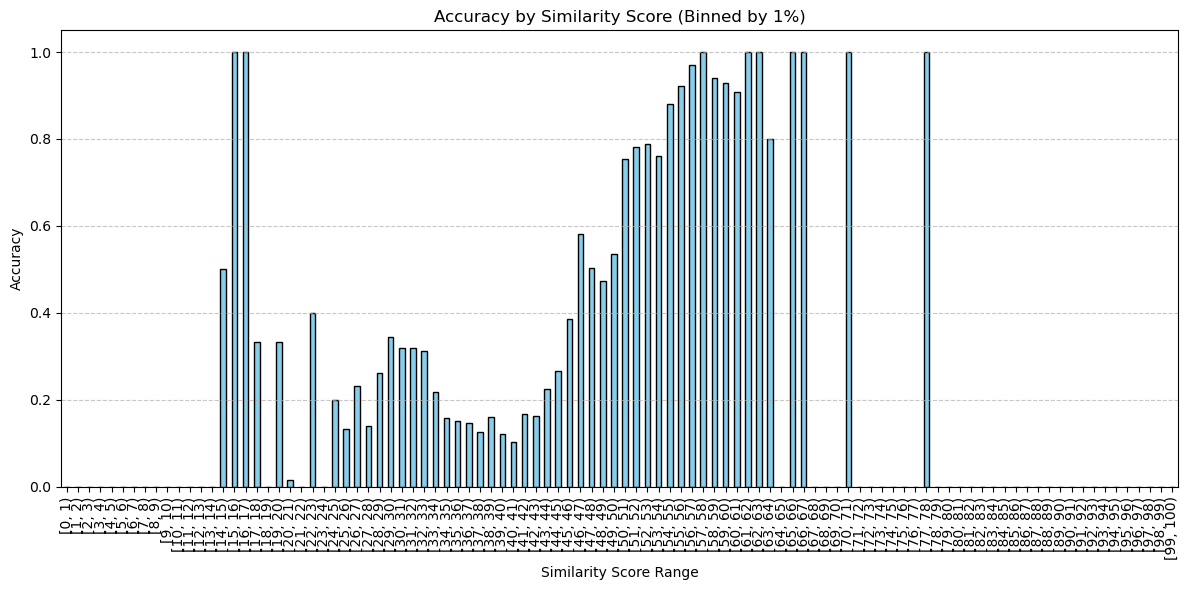

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extract the first similarity score from each list
df['similarity_score'] = df['similarity_scores'].apply(lambda x: x[0] if isinstance(x, list) else x)

bin_edges = np.arange(0, 101, 1) #bin of 1 for range 1 to 100

# Bin the similarity scores
df['score_bin'] = pd.cut(df['similarity_score'], bins=bin_edges, include_lowest=True, right=False)

# Calculate accuracy by bin
accuracy_by_score = df.groupby('score_bin')['is_correct'].mean()

pd.set_option('display.max_rows', None)
# Print the entire list of accuracy by similarity score range
print("Similarity bin   Accuracy")
print(accuracy_by_score)
pd.reset_option('display.max_rows')

# Plot accuracy by similarity score
plt.figure(figsize=(12, 6))
accuracy_by_score.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Accuracy by Similarity Score (Binned by 1%)')
plt.xlabel('Similarity Score Range')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Based on above results, it seems like there is a relationship between accuracy and similarity but reuslts seems to fall off after similarity score of 63%. Using a Chi-square test to determine whether accuracy actually falls off after 63% and if similarity affects accuracy

The Chi-Square Test answers the question:

Are the observed data frequencies significantly different from what we would expect (similarity and accuracy directly proportional) by chance?

Variable 1: Whether the similarity score is above or below the threshold (categorical: True or False).

Variable 2: Whether the prediction is correct (is_correct: categorical 1 or 0).

**chi-squared test**

In [106]:
from scipy.stats import chi2_contingency
import pandas as pd

# Filter rows with valid similarity scores
df_valid = df.dropna(subset=['similarity_score', 'is_correct'])

# Create a binary threshold column
df_valid['above_threshold'] = df_valid['similarity_score'] >= 63

# Contingency table
contingency_table = pd.crosstab(df_valid['above_threshold'], df_valid['is_correct'])
print("Contingency Table:")
print(contingency_table)

# Perform Chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"\nChi-square Test Results:\nChi2 Value: {chi2:.3f}\nP-Value: {p_value:.3f}")

# Evaluate the reliability
if p_value < 0.05:
    print("\nConclusion: The similarity score is statistically significant in predicting correctness.")
else:
    print("\nConclusion: The similarity score is not statistically significant in predicting correctness.")

Contingency Table:
is_correct       False  True 
above_threshold              
False             5423   1828
True                 4     11

Chi-square Test Results:
Chi2 Value: 15.881
P-Value: 0.000

Conclusion: The similarity score is statistically significant in predicting correctness.


1. Does Accuracy Fall Off After 63%?
Observations:
The contingency table shows the number of correct (True) and incorrect (False) predictions for similarity scores above and below 63%:
    - Below 63%: 5,423 incorrect vs. 1,828 correct.
    - Above 63%: 4 incorrect vs. 11 correct.

Analysis:
    - For scores above 63%, the proportion of correct predictions is higher (11/15 ≈ 73%) compared to scores below 63% (1,828/7,251 ≈ 25%).
    - This suggests accuracy does not fall off after 63%. In fact, it improves significantly above this threshold.

2. Does Similarity and Accuracy Have a Relationship?
Observations:

Chi2 Value: 15.881
P-Value: 0.000

Interpretation:
A significant p-value (e.g., < 0.05) means there is evidence that similarity scores and correctness are not independent, confirming a relationship between the two.

**Chi-Sqaure does not imply model performance**:
The chi-squared test does not measure how good or bad the model's predictions are at any threshold.
It only verifies whether higher or lower similarity scores are associated with being correct.
This indicates a statistically significant relationship between similarity scores (above or below 63%) and accuracy.

**calculate precision, recall and f1 score for similarity of 63%** 

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define the contingency table values
true_positive = 11  # Above 63% and correct
false_positive = 4  # Above 63% and incorrect
false_negative = 1828  # Below 63% and correct
true_negative = 5423  # Below 63% and incorrect

# Total number of samples
total_samples = true_positive + false_positive + false_negative + true_negative

# Create the true labels (actual correctness)
y_true = [1] * (true_positive + false_negative) + [0] * (true_negative + false_positive)

# Create the predicted labels (based on the threshold)
y_pred = [1] * (true_positive + false_positive) + [0] * (true_negative + false_negative)

# Ensure the lengths are consistent
assert len(y_true) == len(y_pred), "Mismatch in lengths of y_true and y_pred"

# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print results
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Precision: 1.000
Recall: 0.008
F1 Score: 0.016


1. Precision: 1.000
Interpretation: All predictions made above the 63% similarity threshold are correct.
Implication: The threshold is highly precise, meaning it doesn’t falsely classify incorrect predictions as correct. However, precision alone doesn’t indicate how many correct predictions are captured overall.

2. Recall: 0.008
Interpretation: Only 0.8% of the actual correct predictions (total True labels) are identified by the threshold.
Implication: While predictions above the threshold are always correct, the threshold misses the vast majority of correct predictions. This suggests the threshold is too restrictive.


3. F1 Score: 0.016
Interpretation: The F1 Score, as the harmonic mean of Precision and Recall, is very low (1.6%). This reflects the imbalance between high precision and extremely low recall.
Implication: The model is not performing well overall because it sacrifices recall for precision. It’s too selective about which predictions to classify as correct.

**compare precision, recall, f1 under different similarity thresholds**

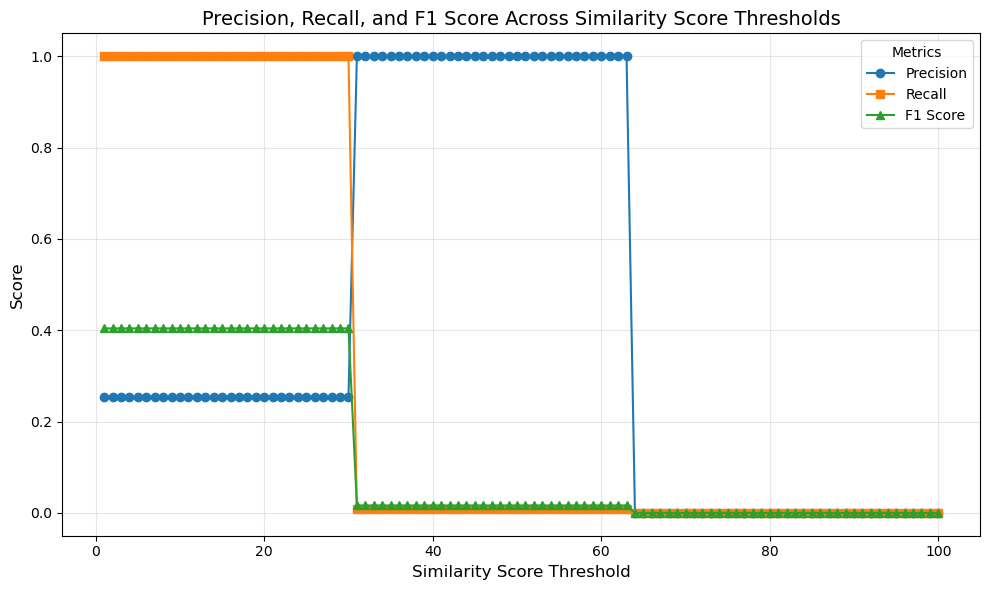

In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Define true labels and similarity scores
y_true = [1] * (true_positive + false_negative) + [0] * (true_negative + false_positive)
similarity_scores = [63.0] * true_positive + [63.0] * false_positive + [30.0] * false_negative + [30.0] * true_negative

# Initialize lists to store results
thresholds = list(range(1, 101))  # Similarity score thresholds from 1 to 100
precisions = []
recalls = []
f1_scores = []

# Test thresholds
for threshold in thresholds:
    # Create predicted labels based on the similarity score threshold
    y_pred = [1 if score >= threshold else 0 for score in similarity_scores]

    # Calculate metrics
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    # Store results
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Plot Precision, Recall, and F1 Score using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision", linestyle='-', marker='o')
plt.plot(thresholds, recalls, label="Recall", linestyle='-', marker='s')
plt.plot(thresholds, f1_scores, label="F1 Score", linestyle='-', marker='^')

# Add labels, legend, and title
plt.title("Precision, Recall, and F1 Score Across Similarity Score Thresholds", fontsize=14)
plt.xlabel("Similarity Score Threshold", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(title="Metrics", fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

Conclusion:
1. Key Transition Point: Around the threshold >30 where Precision spikes to 1.0 and Recall drops sharply, there is a clear trade-off. This is a critical threshold to consider:
Below this point: Predictions are more inclusive (high Recall, low Precision).
Above this point: Predictions are more exclusive (low Recall, high Precision).

2. Precision remains constant at 0 for all thresholds greater than 63. This suggests that there are no or very few true positives being predicted correctly beyond this threshold, likely because the threshold is too high to classify any similarity score as "positive."

3. Lets assume a similarity threshold range of >30 to <=60 is acceptable for subsequent analysis


### Analysis 2: which service numbers are performing well and why?

**for the top performers compute precision, recall and f1 as well as the correct/incorrect predictions inside and outside similiarity range**
<br>within_correct: correct predictions inside range
<br>within_incorrect: incorrect predictions inside range
<br>outside_correct: correct predictions outside range
<br>outside_incorrect: incorrect predictions outside range

In [192]:
import pandas as pd

pd.set_option('display.width', None)
# Flatten the data
rows = []
for entry in df.to_dict("records"):
    expected = entry["expected"]
    for retrieved in entry["retrieved_top_5"]:
        rows.append({
            "query": entry["query"],
            "expected": expected,
            "retrieved_material_number": retrieved["material_number"],
            "retrieved_description": retrieved["description"],
            "score": retrieved["score"],
            "is_correct": retrieved["material_number"] == expected
        })

# Create a DataFrame
flattened_df = pd.DataFrame(rows)

# Calculate precision, recall, F1 score, and correct/incorrect predictions within and outside the range
material_metrics = []
for material_number, group in flattened_df.groupby("retrieved_material_number"):
    # True positives, false positives, false negatives, true negatives
    true_positive = group["is_correct"].sum()
    false_positive = (~group["is_correct"]).sum()
    false_negative = len(flattened_df[flattened_df["expected"] == material_number]) - true_positive
    true_negative = len(flattened_df) - (true_positive + false_positive + false_negative)

    # Metrics
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Correct and incorrect predictions within and outside the similarity score range
    within_range = group[(group["score"] > 30) & (group["score"] <= 63)]
    outside_range = group[(group["score"] <= 30) | (group["score"] > 63)]

    within_correct = within_range["is_correct"].sum()
    within_incorrect = len(within_range) - within_correct

    outside_correct = outside_range["is_correct"].sum()
    outside_incorrect = len(outside_range) - outside_correct

    material_metrics.append({
        "material_number": material_number,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score,
        "within_correct": within_correct,
        "within_incorrect": within_incorrect,
        "outside_correct": outside_correct,
        "outside_incorrect": outside_incorrect
    })

# Create a DataFrame for material metrics
metrics_df = pd.DataFrame(material_metrics)

# Sort by F1 score
metrics_df = metrics_df.sort_values(by="f1_score", ascending=False)
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)     
pd.set_option('display.max_colwidth', None) 
# Display top-performing material numbers along with additional metrics
print(metrics_df[[
    "material_number", "precision", "recall", "f1_score",
    "within_correct", "within_incorrect",
    "outside_correct", "outside_incorrect"
]])

    material_number  precision    recall  f1_score  within_correct  within_incorrect  outside_correct  outside_incorrect
32           217501   0.447273  0.198387  0.274860             121               132                2                 20
8            213201   0.363953  0.186866  0.246943             302               531               11                 16
38           218401   0.289082  0.198298  0.235235             232               505                1                 68
58           223601   0.272727  0.130000  0.176072              39                60                0                 44
42           218999   0.183827  0.126390  0.149791             596              3417              211                166
..              ...        ...       ...       ...             ...               ...              ...                ...
55           223101   0.000000  0.000000  0.000000               0               108                0                 12
54           222701   0.000000  

observations:


In [160]:
# import pandas as pd

# # Ensure the query column is displayed in full
# pd.set_option('display.max_colwidth', None)  # No truncation of column content

# # Identify the top performer based on F1 score
# top_performer = metrics_df.loc[metrics_df['f1_score'].idxmax()]  # Highest F1 score

# # Display the top performer
# print("Top Performer:")
# print(top_performer)

# # Analyze associated queries and descriptions for the top performer
# top_performer_queries = flattened_df[flattened_df['retrieved_material_number'] == top_performer['material_number']]

# # Display insights for the top performer
# print("\nTop Performer Queries and Descriptions:")
# print(top_performer_queries[['query', 'retrieved_material_number', 'retrieved_description', 'score', 'is_correct']])

Top Performer:
material_number      217501
precision          0.447273
recall             0.198387
f1_score            0.27486
Name: 32, dtype: object

Top Performer Queries and Descriptions:
                                                                                                                                                                                                                                                                                                                                                           query  \
5      PROVISION OF A BULK TENDER ON CYBERSECURITY AND AUDIT SERVICES FOR GOVERNMENT MINISTRIES/DEPARTMENTS, STATUTORY BOARDS, ORGANS  OF STATE AND PARTICIPATING UNIVERSITIES    C3SIMSET4Y1:Security Incident Management Exercise Scenario Formulation + Security Incident Management Exercise Conduct  [Provision of Workshop + Exercise (CPX)]/1 to 5:Year 1   
25                                                                              PROVISION OF A B

**Description length analysis for correct matches**

In [ ]:
# correct_df = df[df["is_correct"]]
# correct_materials = correct_df.explode("retrieved_material_numbers")

# correct_materials["retrieved_descriptions"] = correct_materials.apply(
#     lambda row: get_description_for_material(row["retrieved_material_numbers"], row["retrieved_top_5"]),
#     axis=1
# )

# # Add a column for description lengths
# correct_materials["description_length"] = correct_materials["retrieved_descriptions"].apply(
#     lambda desc: len(desc) if isinstance(desc, str) else 0
# )

# # Count the top correct material numbers
# common_correct_matches = correct_materials["retrieved_material_numbers"].value_counts().head(10)

# # Map to material numbers
# material_to_description_correct = correct_materials.drop_duplicates("retrieved_material_numbers").set_index(
#     "retrieved_material_numbers"
# )[["retrieved_descriptions", "description_length"]].to_dict("index")

# # print rows
# print("Most Common Correct Matches with Description Lengths:")
# for material_number, count in common_correct_matches.items():
#     desc_info = material_to_description_correct.get(material_number, {})
#     description = desc_info.get("retrieved_descriptions", "No description available")
#     desc_length = desc_info.get("description_length", 0)
#     print(f"{material_number} - {description} (Count: {count}, Length: {desc_length} characters)")

# # chart of description lengths distribution
# correct_materials["description_length"].hist(bins=20, alpha=0.7, color="green", label="Correct Matches")
# plt.title("Description Length Distribution for Correct Matches")
# plt.xlabel("Description Length (characters)")
# plt.ylabel("Count")
# #plt.legend()
# plt.show()

**Analyze Incorrect Predictions and their description lengths**

In [ ]:
incorrect_df = df[~df["is_correct"]]

# Flatten the retrieved material numbers
incorrect_materials = incorrect_df.explode("retrieved_material_numbers")

def get_description_for_material(material_number, top_5_matches):
    for match in top_5_matches:
        if match["material_number"] == material_number:
            return match["description"]
    return "No description available"

incorrect_materials["retrieved_descriptions"] = incorrect_materials.apply(
    lambda row: get_description_for_material(row["retrieved_material_numbers"], row["retrieved_top_5"]),
    axis=1
)

# Add a column for description lengths
incorrect_materials["description_length"] = incorrect_materials["retrieved_descriptions"].apply(
    lambda desc: len(desc) if isinstance(desc, str) else 0
)

# Count the top incorrect material numbers
common_incorrect_matches = incorrect_materials["retrieved_material_numbers"].value_counts().head(10)

# Map to each material number
material_to_description = incorrect_materials.drop_duplicates("retrieved_material_numbers").set_index(
    "retrieved_material_numbers"
)[["retrieved_descriptions", "description_length"]].to_dict("index")

# print rows
print("Most Common Incorrect Matches with Description Lengths:")
for material_number, count in common_incorrect_matches.items():
    desc_info = material_to_description.get(material_number, {})
    description = desc_info.get("retrieved_descriptions", "No description available")
    desc_length = desc_info.get("description_length", 0)
    print(f"{material_number} - {description} (Count: {count}, Length: {desc_length} characters)")

# chart for top incorrect matches
common_incorrect_matches.plot(kind="bar", title="Top Services with Incorrect Matches")
plt.xlabel("Service Number")
plt.ylabel("Count")
plt.show()

# chart for description length distribution
incorrect_materials["description_length"].plot(kind="hist", bins=20, alpha=0.7, color="orange", title="Description Length Distribution for Incorrect Matches")
plt.xlabel("Description Length (characters)")
plt.ylabel("Count")
plt.show()

**Code below to export results to excel**

In [ ]:
# # Prepare data for export
# additional_data = []

# for result in results:  
#     # Combine expected material number and description
#     expected_combined = f"{result['expected']} - {result['expected_description']}"

#     # Combine top 5 matched material numbers into a single string
#     top_matches_combined = "; ".join(
#         [f"{match['material_number']} score:{match['score']}" for match in result["retrieved_top_5"]]
#     )

#     additional_data.append({
#         "query": result["query"],
#         "expected": expected_combined,  
#         "matches": top_matches_combined,  
#         "is_correct": "True" if result["is_correct"] else "False"  
#     })

# additional_df = pd.DataFrame(additional_data)

# output_path = "../data/output/evaluation_results.xlsx"

# # Dynamically get the model name
# model_name = getattr(search_engine, "model_name", "Unknown_Model")
# sheet_name = model_name.replace("/", "_")[:31]  

# os.makedirs(os.path.dirname(output_path), exist_ok=True)

# # Append to the Excel file
# with pd.ExcelWriter(output_path, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
#     additional_df.to_excel(writer, index=False, sheet_name=sheet_name)

# print(f"Additional results appended to sheet '{sheet_name}' in: {output_path}")